# Gradient calculation
\begin{equation*}
z = \sin(x^2 + y^2) 
\end{equation*}

\begin{align*}
\dfrac{\partial z}{\partial x} = \cos(x^2 + y^2) \cdot 2x \\ \\
\dfrac{\partial z}{\partial y} = \cos(x^2 + y^2) \cdot 2y
\end{align*}

In [1]:
# Implement the function 
import numpy as np 

#function
def func(x,y):
    return np.sin(x**2 + y**2)


In [2]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

X,Y = np.meshgrid(x,y)

Z = func(X,Y)

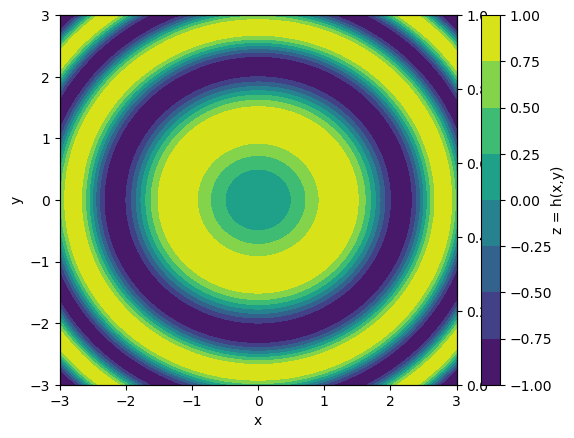

In [3]:
import matplotlib.pyplot as plt 

# contour plot
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax2 = ax.twinx()
ax2.set_ylabel('z = h(x,y)', labelpad=45)
fig.colorbar(cp)
plt.show()

# Gradient of complex mathmetical expression

\begin{equation*}
f(x, y) = x*y^2 + 2*y
\end{equation*}


In [4]:
#let's define first the varibale x and y

import torch

x = torch.tensor([1.0], requires_grad =True)
y = torch.tensor([1.0], requires_grad =True)

#function
z = x*y**2 +2*y


#backward propagation
z.backward()


#gradients w.r.t x and y
dz_dx = x.grad
dz_dy = y.grad

print(f'Gradient w..r.t x {dz_dx}')
print(f'Gradient w..r.t y {dz_dy}')

Gradient w..r.t x tensor([1.])
Gradient w..r.t y tensor([4.])


In [5]:
import random 
def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

    print(f'Random seed {seed} has been set.')


# Linear Regression

In [50]:
# Generate random sample date
from torch import pi
set_seed(seed=2021)
input_size = 32

inputs = torch.linspace(-1.0,1.0, input_size).reshape(input_size,1)

#add random noise 
noise = torch.randn(input_size,1)/4
targets = torch.sin(pi*inputs) + noise + torch.cos(pi*inputs) 

print(noise.shape, inputs.shape, targets.shape)

Random seed 2021 has been set.
torch.Size([32, 1]) torch.Size([32, 1]) torch.Size([32, 1])


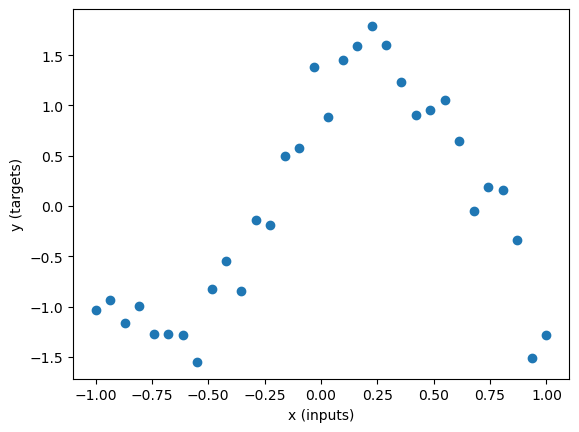

In [51]:
plt.scatter(inputs, targets)
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

In [52]:
inputs  = inputs.clone().detach().requires_grad_(True)
targets = targets.clone().detach().requires_grad_(True)

In [56]:
from torch import nn 

class Regresson(nn.Module):
    
    def __init__(self):

        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(1, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 1),
        )
        
    def forward(self, x):
        return self.layers(x)
    
    
    
def train(epochs, lr):
    #model
    regression_model = Regresson()


    # define loss function
    loss_function = nn.MSELoss()

    #optimizer
    optimizer = torch.optim.SGD(regression_model.parameters(), lr=lr, momentum=0.9)
    
    # loss record
    loss_record = []
    

    # Run the loop
    for epoch in range(0,epochs): 
        
        
        # zero the gradients
        optimizer.zero_grad()
        
        #prediction
        prediction = regression_model(inputs)
        
        #loss
        loss = loss_function(prediction, targets)
        #print(f'Loss: {loss.item()}')
        
        # back propagation
        loss.backward()
        #loss.requires_grad = True
        
        #optimzer
        optimizer.step()
        
        #loss record append
        loss_record.append(loss.item())
        
        
        if epoch%10==0:
            print(f'Starting Epochs {epoch+1}, loss = {loss}')
        
    return loss_record, prediction

     

In [57]:
loss_record, prediction = train(100,0.003)

Starting Epochs 1, loss = 1.1314163208007812
Starting Epochs 11, loss = 1.0618454217910767
Starting Epochs 21, loss = 0.9541327953338623
Starting Epochs 31, loss = 0.7776485681533813
Starting Epochs 41, loss = 0.5973132848739624
Starting Epochs 51, loss = 0.5061635971069336
Starting Epochs 61, loss = 0.4101616442203522
Starting Epochs 71, loss = 0.2868824303150177
Starting Epochs 81, loss = 0.17373423278331757
Starting Epochs 91, loss = 0.11098409444093704


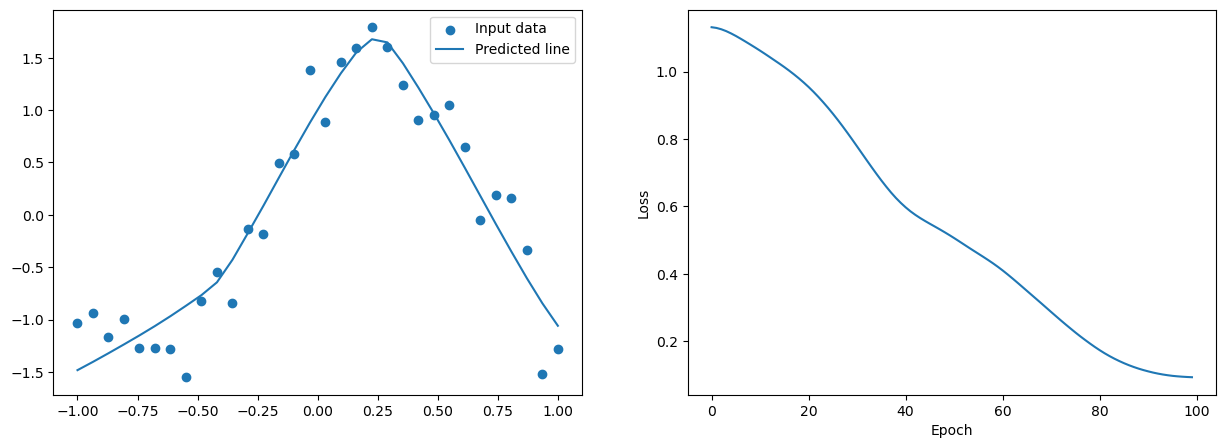

In [58]:
fig, ax = plt.subplots(1,2, figsize = (15,5))


ax[0].scatter(inputs.detach().numpy(), targets.detach().numpy(), label = 'Input data')
ax[0].plot(inputs.detach().numpy(),    prediction.detach().numpy(), label ='Predicted line')
ax[0].legend()

ax[1].plot(loss_record)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.show()

# Reference 
**https://deeplearning.neuromatch.io/tutorials/W1D2_LinearDeepLearning/student/W1D2_Tutorial1.html**

# Logistic Regression 

In [59]:
# importing MNIST datasets

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

mnist_train = datasets.MNIST(
                               root="data",
                               train = True,
                               download=True, 
                               transform=ToTensor()
)

mnist_test = datasets.MNIST(
                               root="data",
                               train = False,
                               download=True, 
                               transform=ToTensor()
)

In [60]:
print(len(mnist_train), len(mnist_test))

60000 10000


In [61]:
print(mnist_dataset.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


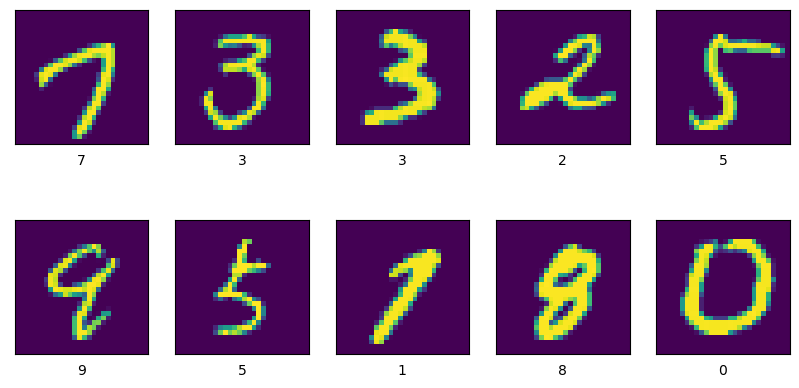

In [157]:
import random
import torch
import matplotlib.pyplot as plt 

random_image = random.randint(0, len(mnist_train))

image, labels = mnist_train[random_image]
image = torch.permute(image, (1,2,0))


plt.figure(figsize=(10,5))

j =0
for i in range(1,11):
    j = j+1
    plt.subplot(2,5,j)
    random_image = random.randint(0, len(mnist_train))
    image, labels = mnist_train[random_image]
    image = torch.permute(image, (1,2,0))
    plt.imshow(image)
    plt.xlabel(labels)
    plt.xticks([])
    plt.yticks([])
    